In [ ]:
!pip install pandas seaborn matplotlib scikit-learn xgboost

In [ ]:
pip install kaggle

In [ ]:
!kaggle datasets list


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
# Downloading and unzip DRIAMS dataset (eg. DRIAMS-A)
!kaggle datasets download -d drscarlat/driams --unzip


Dataset URL: https://www.kaggle.com/datasets/drscarlat/driams
License(s): CC0-1.0
100% 8.23G/8.25G [01:01<00:00, 216MB/s]
100% 8.25G/8.25G [01:01<00:00, 144MB/s]


In [ ]:
import os
os.listdir()


['.config',
 'DRIAMS-C',
 'README.md',
 'DRIAMS-D',
 'DRIAMS-B',
 'DRIAMS-A',
 'sample_data']

In [ ]:
# List the contents of the 'binned_6000' directory
binned_files = os.listdir('DRIAMS-A/binned_6000')
print("binned_6000 contents:", binned_files)

# List the contents of the 'id' directory
id_files = os.listdir('DRIAMS-A/id')
print("id contents:", id_files)


binned_6000 contents: ['2016', '2015', '2018', '2017']
id contents: ['2016', '2015', '2018', '2017']


In [ ]:
# Listing the contents of the '2018' directory inside 'binned_6000'
binned_2018_files = os.listdir('DRIAMS-A/binned_6000/2018')
print("binned_6000/2018 contents:", binned_2018_files)

# Listing the contents of the '2018' directory inside 'id'
id_2018_files = os.listdir('DRIAMS-A/id/2018')
print("id/2018 contents:", id_2018_files)


binned_6000/2018 contents: ['c8a783b3-9614-40dd-8698-6610ad7df2e2_MALDI1.txt', 'dc3d60ea-28f1-49d0-8a03-2baa0dd85e01_MALDI2.txt', 'ba8d6a27-6829-4872-a868-42aa5be082e0_MALDI2.txt', '7dd814c5-c7f6-4d3c-8286-4e4de4c095f6_MALDI1.txt', '71c8569d-96fa-452d-b660-e081f9c8803b_MALDI2.txt', 'fa27e959-9340-4c39-855b-ca74ba85ca47_MALDI1.txt', 'b9e765ea-3cef-4aed-a122-dc81bb419208_MALDI2.txt', '6c88f766-a0f7-4b6c-8d4f-2b782ac3fd01_MALDI1.txt', '53a16463-0248-4dbf-a97e-d503053d8fc5_MALDI1.txt', '4b4531e2-350d-4bdd-be60-5d37e6329d4e_MALDI2.txt', '372e4314-10b6-4ee0-8ead-23ad00e3cd83_MALDI1.txt', '8f22b0c1-7b63-42b3-bbc8-f948a9cdd29a_MALDI1.txt', 'fc635330-61e2-4cae-a63d-fccd994433ca_MALDI2.txt', '51b917ef-ece1-4b46-831d-b1b20fe6e057_MALDI1.txt', '11e96aa8-f742-491c-adcc-c93bb41645ac_MALDI2.txt', '9d7557a7-1d5e-4a81-80eb-714b8156a083_MALDI1.txt', 'a279eb2d-de6a-457b-8781-7fbcfc6ee996_MALDI2.txt', '26d07fc3-bf3e-4b2c-b377-7912bebe9862_MALDI2.txt', '69cb4668-208c-4db4-b40c-785f277b11eb_MALDI2.txt', '62

In [ ]:
import pandas as pd

# Loading the 2018_clean.csv file
file_path = 'DRIAMS-A/id/2018/2018_clean.csv'
data = pd.read_csv(file_path)

data.head()

# basic information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30069 entries, 0 to 30068
Data columns (total 87 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Unnamed: 0.1                                   30069 non-null  int64 
 1   Unnamed: 0                                     30069 non-null  int64 
 2   code                                           30069 non-null  object
 3   species                                        30069 non-null  object
 4   laboratory_species                             22106 non-null  object
 5   Penicillin                                     9997 non-null   object
 6   Ceftriaxone                                    9997 non-null   object
 7   Vancomycin                                     9997 non-null   object
 8   Piperacillin-Tazobactam                        9997 non-null   object
 9   Ciprofloxacin                                  9997 non-null 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

antibiotics_columns = ['Penicillin', 'Ceftriaxone', 'Vancomycin', 'Piperacillin-Tazobactam', 'Ciprofloxacin']
feature_columns = ['species']

# droping the missing values
data_clean = data.dropna(subset=antibiotics_columns)

# Encoding the species
le_species = LabelEncoder()
data_clean['species_encoded'] = le_species.fit_transform(data_clean['species'])

# Encoding the antibiotic resistance
for col in antibiotics_columns:
    le = LabelEncoder()
    data_clean[col + '_encoded'] = le.fit_transform(data_clean[col])

# Feature selection
X = data_clean[['species_encoded']]
y = data_clean['Penicillin_encoded']

# training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7997, 1) (2000, 1) (7997,) (2000,)


<ipython-input-11-4ea2bffac816>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['species_encoded'] = le_species.fit_transform(data_clean['species'])
<ipython-input-11-4ea2bffac816>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_encoded'] = le.fit_transform(data_clean[col])
<ipython-input-11-4ea2bffac816>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
import os

os.listdir('DRIAMS-A')


['binned_6000', 'id']

In [ ]:
import os

os.listdir('DRIAMS-A/binned_6000')


['2016', '2015', '2018', '2017']

In [ ]:
os.listdir('DRIAMS-A/id')


['2016', '2015', '2018', '2017']

In [ ]:
import os

print("Contents of binned_6000:")
print(os.listdir('DRIAMS-A/binned_6000'))

print("\nContents of id:")
print(os.listdir('DRIAMS-A/id'))


Contents of binned_6000:
['2016', '2015', '2018', '2017']

Contents of id:
['2016', '2015', '2018', '2017']


In [ ]:
import os

print("Contents of binned_6000/2018:")
print(os.listdir('DRIAMS-A/binned_6000/2018'))

print("\nContents of id/2018:")
print(os.listdir('DRIAMS-A/id/2018'))


Contents of binned_6000/2018:
['c8a783b3-9614-40dd-8698-6610ad7df2e2_MALDI1.txt', 'dc3d60ea-28f1-49d0-8a03-2baa0dd85e01_MALDI2.txt', 'ba8d6a27-6829-4872-a868-42aa5be082e0_MALDI2.txt', '7dd814c5-c7f6-4d3c-8286-4e4de4c095f6_MALDI1.txt', '71c8569d-96fa-452d-b660-e081f9c8803b_MALDI2.txt', 'fa27e959-9340-4c39-855b-ca74ba85ca47_MALDI1.txt', 'b9e765ea-3cef-4aed-a122-dc81bb419208_MALDI2.txt', '6c88f766-a0f7-4b6c-8d4f-2b782ac3fd01_MALDI1.txt', '53a16463-0248-4dbf-a97e-d503053d8fc5_MALDI1.txt', '4b4531e2-350d-4bdd-be60-5d37e6329d4e_MALDI2.txt', '372e4314-10b6-4ee0-8ead-23ad00e3cd83_MALDI1.txt', '8f22b0c1-7b63-42b3-bbc8-f948a9cdd29a_MALDI1.txt', 'fc635330-61e2-4cae-a63d-fccd994433ca_MALDI2.txt', '51b917ef-ece1-4b46-831d-b1b20fe6e057_MALDI1.txt', '11e96aa8-f742-491c-adcc-c93bb41645ac_MALDI2.txt', '9d7557a7-1d5e-4a81-80eb-714b8156a083_MALDI1.txt', 'a279eb2d-de6a-457b-8781-7fbcfc6ee996_MALDI2.txt', '26d07fc3-bf3e-4b2c-b377-7912bebe9862_MALDI2.txt', '69cb4668-208c-4db4-b40c-785f277b11eb_MALDI2.txt', 

In [ ]:

file_path = 'DRIAMS-A/binned_6000/2018/35b1da8f-6ba3-4ed1-9c24-6cdbedac3ce6_MALDI1.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

print("First 5 lines of the file:")
print(lines[:5])


First 5 lines of the file:
['bin_index binned_intensity\n', '0 0.001384168988241709\n', '1 0.0017490453501902302\n', '2 0.0011727714394545205\n', '3 0.0003551132172751908\n']


In [ ]:
import pandas as pd

# Loading  2018_clean.csv
clean_df = pd.read_csv('DRIAMS-A/id/2018/2018_clean.csv')
print("Contents of 2018_clean.csv:")
print(clean_df.head())
print("\nInfo for 2018_clean.csv:")
print(clean_df.info())

strat_df = pd.read_csv('DRIAMS-A/id/2018/2018_strat.csv')
print("\nContents of 2018_strat.csv:")
print(strat_df.head())
print("\nInfo for 2018_strat.csv:")
print(strat_df.info())


Contents of 2018_clean.csv:
   Unnamed: 0.1  Unnamed: 0                                         code  \
0             0           0  18e02f6b-4b84-4344-9b7a-2a9cc2b5e2b6_MALDI1   
1             1           1  e9544679-3f9d-43f6-8ce3-aac053980742_MALDI1   
2             2           2  bfcad108-864f-4b37-83f3-d7dc94265213_MALDI1   
3             3           3  c649f842-5926-4bb3-8aef-d411db4241f4_MALDI1   
4             4           4  69eca649-ec26-4f9d-9f9a-d42aa5b9ec0f_MALDI1   

                  species      laboratory_species Penicillin Ceftriaxone  \
0  Pseudomonas aeruginosa  Pseudomonas aeruginosa          -           -   
1        Candida glabrata        Candida glabrata          -           -   
2   Klebsiella pneumoniae   Klebsiella pneumoniae          -           S   
3  Staphylococcus capitis  Staphylococcus capitis          R           R   
4        Escherichia coli        Escherichia coli          -           S   

  Vancomycin Piperacillin-Tazobactam Ciprofloxacin  ... Ce

In [ ]:
# Inspecting the column names in clean_df
print("Columns in clean_df:")
print(clean_df.columns)

# Inspecting the column names in strat_df
print("\nColumns in strat_df:")
print(strat_df.columns)


Columns in clean_df:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'code', 'species', 'laboratory_species',
       'Penicillin', 'Ceftriaxone', 'Vancomycin', 'Piperacillin-Tazobactam',
       'Ciprofloxacin', 'Cefepime', 'Cotrimoxazole', 'Meropenem',
       'Moxifloxacin', 'Amoxicillin-Clavulanic acid', 'Colistin', 'Tobramycin',
       'Ceftazidime', 'Ceftolozane-Tazobactam', 'Ceftazidime-Avibactam',
       'Ceftobiprole', 'Quinolones', 'Tigecycline', 'Levofloxacin',
       'Fosfomycin', 'Amikacin', 'Imipenem', 'Minocycline', 'Gentamicin',
       'Ceftarolin', 'Ampicillin-Sulbactam', 'Gentamicin_high_level',
       'Aztreonam', 'Clindamycin', 'Amoxicillin', 'Metronidazole',
       'Daptomycin', 'Ampicillin-Amoxicillin', 'Caspofungin', 'Voriconazole',
       'Posaconazole', 'Amphotericin B', 'Itraconazole', 'Fluconazole',
       'Erythromycin', 'Doxycycline', 'Isavuconazole', 'Anidulafungin',
       '5-Fluorocytosine', 'Micafungin', 'Tetracycline', 'Azithromycin',
       'Ertapenem', 'Fosfomycin

In [ ]:
# Merging and inspecting the coloums
merged_metadata = pd.merge(clean_df, strat_df, on='code')

print("Merged Metadata:")
print(merged_metadata.head())
print(merged_metadata.info())


Merged Metadata:
   Unnamed: 0.1  Unnamed: 0_x                                         code  \
0             0             0  18e02f6b-4b84-4344-9b7a-2a9cc2b5e2b6_MALDI1   
1             1             1  e9544679-3f9d-43f6-8ce3-aac053980742_MALDI1   
2             2             2  bfcad108-864f-4b37-83f3-d7dc94265213_MALDI1   
3             3             3  c649f842-5926-4bb3-8aef-d411db4241f4_MALDI1   
4             4             4  69eca649-ec26-4f9d-9f9a-d42aa5b9ec0f_MALDI1   

                species_x    laboratory_species_x Penicillin_x Ceftriaxone_x  \
0  Pseudomonas aeruginosa  Pseudomonas aeruginosa            -             -   
1        Candida glabrata        Candida glabrata            -             -   
2   Klebsiella pneumoniae   Klebsiella pneumoniae            -             S   
3  Staphylococcus capitis  Staphylococcus capitis            R             R   
4        Escherichia coli        Escherichia coli            -             S   

  Vancomycin_x Piperacillin-Tazob

In [ ]:
print("Columns in merged_metadata:")
print(merged_metadata.columns)
print("Values in Penicillin_x:")
print(merged_metadata['Penicillin_x'].unique())

print("\nValues in Penicillin_y:")
print(merged_metadata['Penicillin_y'].unique())



Columns in merged_metadata:
Index(['Unnamed: 0.1', 'Unnamed: 0_x', 'code', 'species_x',
       'laboratory_species_x', 'Penicillin_x', 'Ceftriaxone_x', 'Vancomycin_x',
       'Piperacillin-Tazobactam_x', 'Ciprofloxacin_x',
       ...
       'Clarithromycin_y', 'Penicillin_with_other_infections_y',
       'Penicillin_with_pneumonia_y', 'Meropenem_with_pneumonia_y',
       'acquisition_date', 'acquisition_time', 'workstation', 'patient_no',
       'case_no', 'order_no'],
      dtype='object', length=178)
Values in Penicillin_x:
['-' 'R' nan 'S' 'I' 'R(1), S(1)' 'I(1), S(1)']

Values in Penicillin_y:
['-' 'R' nan 'S' 'I' 'R(1), S(1)' 'I(1), S(1)']


In [ ]:
import numpy as np
# Choosing Penicillin_x and cleaning the missing  values
merged_metadata['Penicillin'] = merged_metadata['Penicillin_x'].replace('-', np.nan)

merged_metadata['Penicillin'] = merged_metadata['Penicillin'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

print(merged_metadata['Penicillin'].unique())


[nan 'R' 'S' 'I' 'R(1)' 'I(1)']


In [ ]:
resistance_by_status = merged_metadata['Penicillin'].value_counts()
print(resistance_by_status)


Penicillin
R       2437
S        862
I         55
R(1)      37
I(1)       5
Name: count, dtype: int64


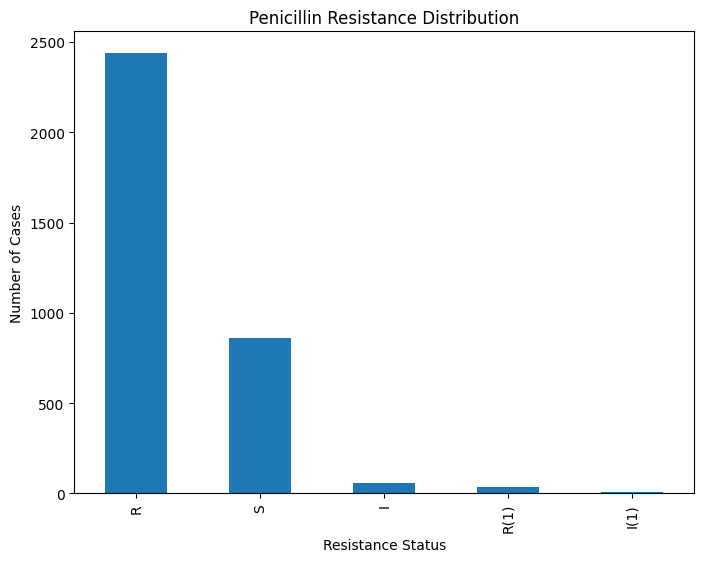

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of resistance status
resistance_by_status.plot(kind='bar', figsize=(8, 6))
plt.title('Penicillin Resistance Distribution')
plt.xlabel('Resistance Status')
plt.ylabel('Number of Cases')
plt.show()


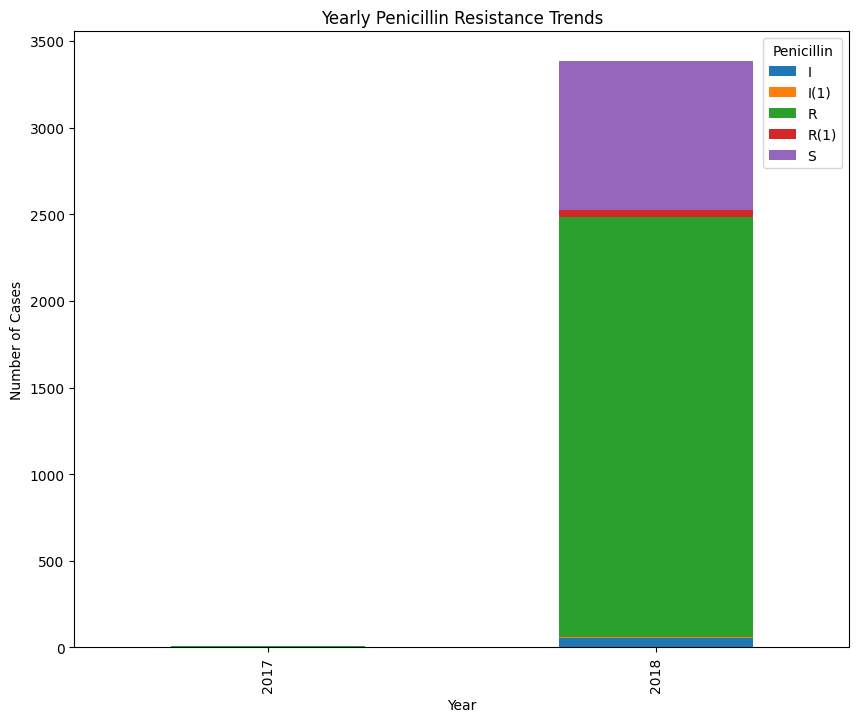

In [ ]:
merged_metadata['acquisition_date'] = pd.to_datetime(merged_metadata['acquisition_date'])

yearly_trends = merged_metadata.groupby(merged_metadata['acquisition_date'].dt.year)['Penicillin'].value_counts().unstack()

# Plot trends
yearly_trends.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Yearly Penicillin Resistance Trends')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()


In [ ]:
import os

print("Files in Current Directory:")
print(os.listdir())


Files in Current Directory:
['.config', 'DRIAMS-C', 'README.md', 'DRIAMS-D', 'DRIAMS-B', 'DRIAMS-A', 'sample_data']


In [ ]:

print("Contents of DRIAMS-A/id/2018:")
print(os.listdir('DRIAMS-A/id/2018'))


Contents of DRIAMS-A/id/2018:
['2018_clean.csv', '2018_strat.csv']


In [ ]:
import pandas as pd

df = pd.read_csv('DRIAMS-A/id/2018/2018_clean.csv')
print("Dataset Loaded Successfully:")
print(df.head())


Dataset Loaded Successfully:
   Unnamed: 0.1  Unnamed: 0                                         code  \
0             0           0  18e02f6b-4b84-4344-9b7a-2a9cc2b5e2b6_MALDI1   
1             1           1  e9544679-3f9d-43f6-8ce3-aac053980742_MALDI1   
2             2           2  bfcad108-864f-4b37-83f3-d7dc94265213_MALDI1   
3             3           3  c649f842-5926-4bb3-8aef-d411db4241f4_MALDI1   
4             4           4  69eca649-ec26-4f9d-9f9a-d42aa5b9ec0f_MALDI1   

                  species      laboratory_species Penicillin Ceftriaxone  \
0  Pseudomonas aeruginosa  Pseudomonas aeruginosa          -           -   
1        Candida glabrata        Candida glabrata          -           -   
2   Klebsiella pneumoniae   Klebsiella pneumoniae          -           S   
3  Staphylococcus capitis  Staphylococcus capitis          R           R   
4        Escherichia coli        Escherichia coli          -           S   

  Vancomycin Piperacillin-Tazobactam Ciprofloxacin  ... C

In [ ]:
# Target variable: Resistance to a specific antibiotic
target = 'Penicillin'
df = df.dropna(subset=[target])


df[target] = df[target].replace('-', 'unknown')
df[target] = df[target].astype('category').cat.codes

X = df.drop(['code', target], axis=1)
X = pd.get_dummies(X, drop_first=True)


y = df[target]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.00      0.00      0.00         1
           2       0.99      0.99      0.99       704
           3       1.00      1.00      1.00        12
           4       0.97      0.97      0.97       270
           5       1.00      1.00      1.00      1997

    accuracy                           0.99      3000
   macro avg       0.79      0.78      0.79      3000
weighted avg       0.99      0.99      0.99      3000

Accuracy: 0.993


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


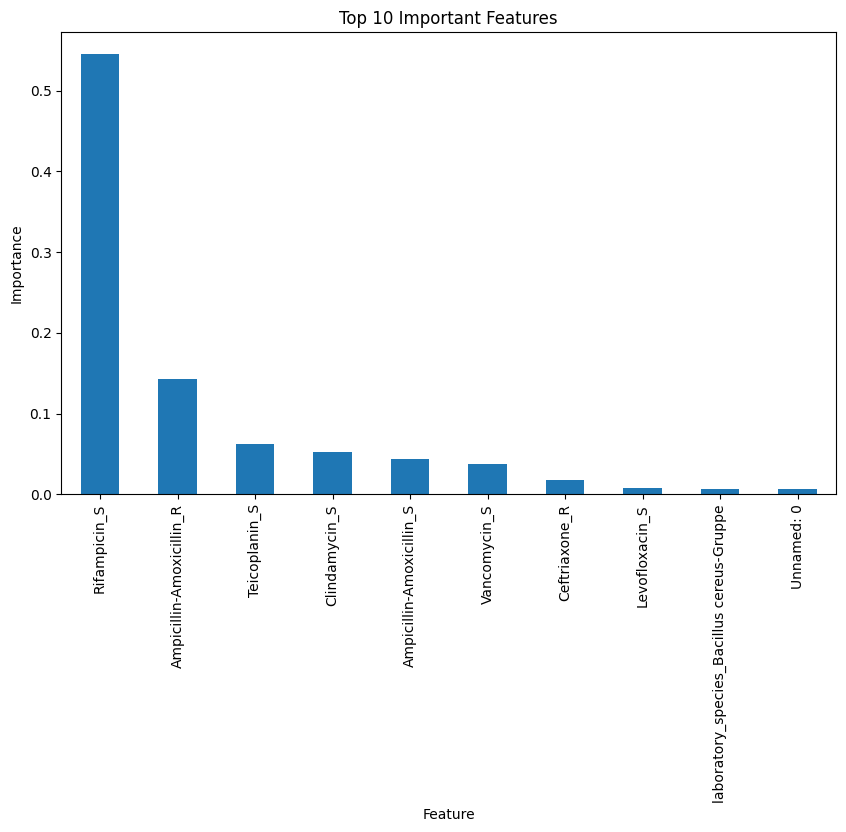

In [ ]:
import matplotlib.pyplot as plt
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance[:10].plot(kind='bar')
plt.title('Top 10 Important Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


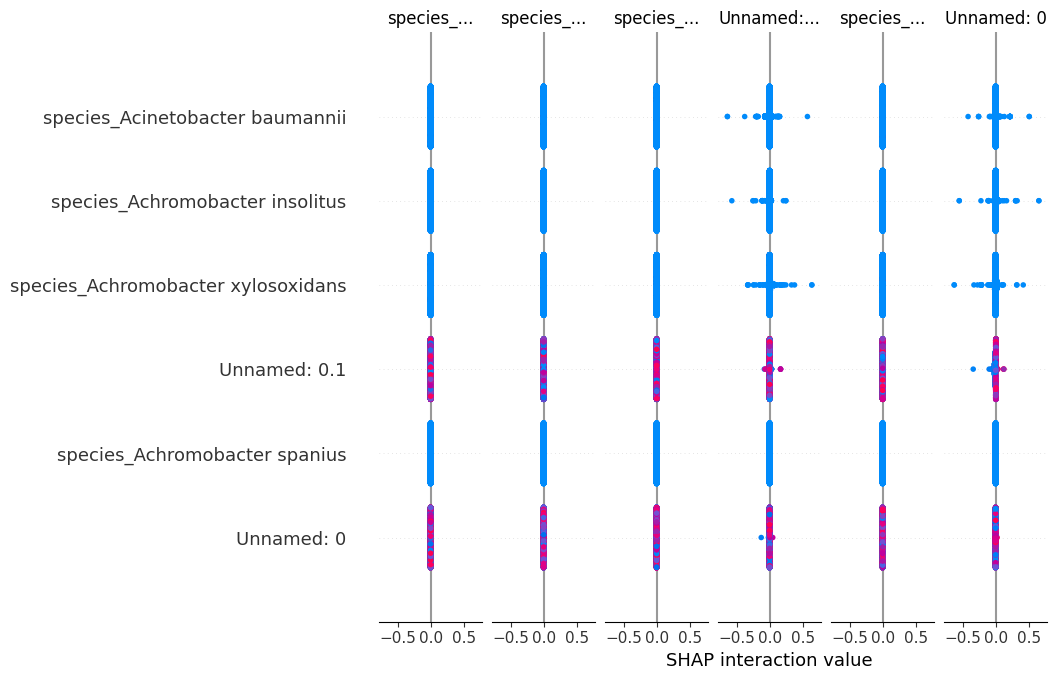

In [ ]:
!pip install shap

import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

#Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9901379556826304


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training and testing Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.00      0.00      0.00         1
           2       1.00      0.99      1.00       704
           3       1.00      1.00      1.00        12
           4       0.98      0.98      0.98       270
           5       1.00      1.00      1.00      1997

    accuracy                           0.99      3000
   macro avg       0.82      0.81      0.81      3000
weighted avg       0.99      0.99      0.99      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Training Data Columns:", X_train.columns)
print("Test Data Columns:", X_test.columns)
assert list(X_train.columns) == list(X_test.columns), "Column mismatch between train and test data!"


Training Data Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'species_Achromobacter insolitus',
       'species_Achromobacter spanius', 'species_Achromobacter xylosoxidans',
       'species_Acinetobacter baumannii', 'species_Acinetobacter johnsonii',
       'species_Acinetobacter junii', 'species_Acinetobacter lwoffii',
       'species_Acinetobacter pittii',
       ...
       'Penicillin_with_meningitis_R(1), S(1)', 'Penicillin_with_meningitis_S',
       'Clarithromycin_R', 'Clarithromycin_S',
       'Penicillin_with_other_infections_I',
       'Penicillin_with_other_infections_R',
       'Penicillin_with_other_infections_S', 'Penicillin_with_pneumonia_R',
       'Penicillin_with_pneumonia_S', 'Meropenem_with_pneumonia_S'],
      dtype='object', length=698)
Test Data Columns: Index(['Unnamed: 0.1', 'Unnamed: 0', 'species_Achromobacter insolitus',
       'species_Achromobacter spanius', 'species_Achromobacter xylosoxidans',
       'species_Acinetobacter baumannii', 'species_Acinetobacter

In [ ]:

if list(X_train.columns) == list(X_test.columns):
    print("Columns match perfectly!")
else:
    print("Column mismatch found!")
    for col in X_train.columns:
        if col not in X_test.columns:
            print(f"Missing in test set: {col}")
    for col in X_test.columns:
        if col not in X_train.columns:
            print(f"Missing in training set: {col}")


Columns match perfectly!


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
!pip install -U shap


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Training and testing logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00         1
           2       0.79      0.98      0.87       704
           3       0.00      0.00      0.00        12
           4       0.12      0.01      0.03       270
           5       0.91      0.96      0.94      1997

    accuracy                           0.87      3000
   macro avg       0.30      0.32      0.31      3000
weighted avg       0.80      0.87      0.83      3000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training and testing Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.00      0.00      0.00         1
           2       1.00      0.99      1.00       704
           3       1.00      1.00      1.00        12
           4       0.98      0.98      0.98       270
           5       1.00      1.00      1.00      1997

    accuracy                           0.99      3000
   macro avg       0.82      0.81      0.81      3000
weighted avg       0.99      0.99      0.99      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Unique classes in y_test:", y_test.unique())


Unique classes in y_test: [2 5 4 3 0 1]


In [ ]:
# Filtering relevant classes in y_test and y_train
relevant_classes = [0, 1, 2]
X_train = X_train[y_train.isin(relevant_classes)]
y_train = y_train[y_train.isin(relevant_classes)]

X_test = X_test[y_test.isin(relevant_classes)]
y_test = y_test[y_test.isin(relevant_classes)]


In [ ]:
#  class mapping
class_mapping = {
    0: 'Intermediate',
    1: 'Resistant',
    2: 'Susceptible'
}


y_test = y_test.map(class_mapping)
y_train = y_train.map(class_mapping)


In [ ]:
print("Unique classes in y_test before filtering:", y_test.unique())


relevant_classes = [0, 1, 2]
y_test_filtered = y_test[y_test.isin(relevant_classes)]
X_test_filtered = X_test[y_test.isin(relevant_classes)]

print("Unique classes in y_test after filtering:", y_test_filtered.unique())
print("Shape of X_test after filtering:", X_test_filtered.shape)


Unique classes in y_test before filtering: ['Susceptible' 'Intermediate' 'Resistant']
Unique classes in y_test after filtering: []
Shape of X_test after filtering: (0, 698)


In [ ]:
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'code', 'species', 'laboratory_species',
       'Penicillin', 'Ceftriaxone', 'Vancomycin', 'Piperacillin-Tazobactam',
       'Ciprofloxacin', 'Cefepime', 'Cotrimoxazole', 'Meropenem',
       'Moxifloxacin', 'Amoxicillin-Clavulanic acid', 'Colistin', 'Tobramycin',
       'Ceftazidime', 'Ceftolozane-Tazobactam', 'Ceftazidime-Avibactam',
       'Ceftobiprole', 'Quinolones', 'Tigecycline', 'Levofloxacin',
       'Fosfomycin', 'Amikacin', 'Imipenem', 'Minocycline', 'Gentamicin',
       'Ceftarolin', 'Ampicillin-Sulbactam', 'Gentamicin_high_level',
       'Aztreonam', 'Clindamycin', 'Amoxicillin', 'Metronidazole',
       'Daptomycin', 'Ampicillin-Amoxicillin', 'Caspofungin', 'Voriconazole',
       'Posaconazole', 'Amphotericin B', 'Itraconazole', 'Fluconazole',
       'Erythromycin', 'Doxycycline', 'Isavuconazole', 'Anidulafungin',
       '5-Fluorocytosine', 'Micafungin', 'Tetracycline', 'Azithromycin',
       'Ertapenem', 'Fosfomy

In [ ]:
print("Unique values in the 'Penicillin' column:")
print(df['Penicillin'].unique())


Unique values in the 'Penicillin' column:
[5 2 4 0 3 1]


In [ ]:
# Defining a mapping for the Penicillin values
penicillin_mapping = {
    0: 'Intermediate',
    1: 'Resistant',
    2: 'Susceptible',
    3: 'Class_3',
    4: 'Class_4',
    5: 'Class_5'
}

df['Penicillin_label'] = df['Penicillin'].map(penicillin_mapping)

print("Mapped labels in 'Penicillin_label':")
print(df['Penicillin_label'].unique())


Mapped labels in 'Penicillin_label':
['Class_5' 'Susceptible' 'Class_4' 'Intermediate' 'Class_3' 'Resistant']


In [ ]:

relevant_classes = [0, 1, 2]
df = df[df['Penicillin'].isin(relevant_classes)]


print("Unique values after filtering:", df['Penicillin'].unique())


Unique values after filtering: [2 0 1]


In [ ]:
# Definining the features and target
X = df.drop(['Penicillin', 'Penicillin_label', 'code'], axis=1)
y = df['Penicillin']


X = pd.get_dummies(X, drop_first=True)

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (2497, 219)
Shape of target (y): (2497,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Training and testing the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Intermediate', 'Resistant', 'Susceptible']))


Classification Report:
              precision    recall  f1-score   support

Intermediate       0.94      0.94      0.94        17
   Resistant       1.00      1.00      1.00         1
 Susceptible       1.00      1.00      1.00       732

    accuracy                           1.00       750
   macro avg       0.98      0.98      0.98       750
weighted avg       1.00      1.00      1.00       750



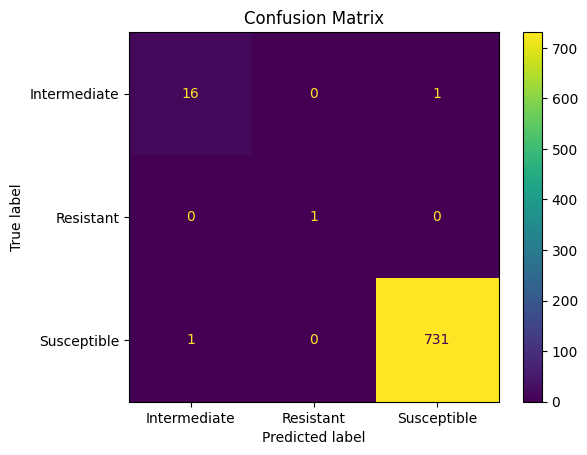

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=['Intermediate', 'Resistant', 'Susceptible']
)
plt.title("Confusion Matrix")
plt.show()


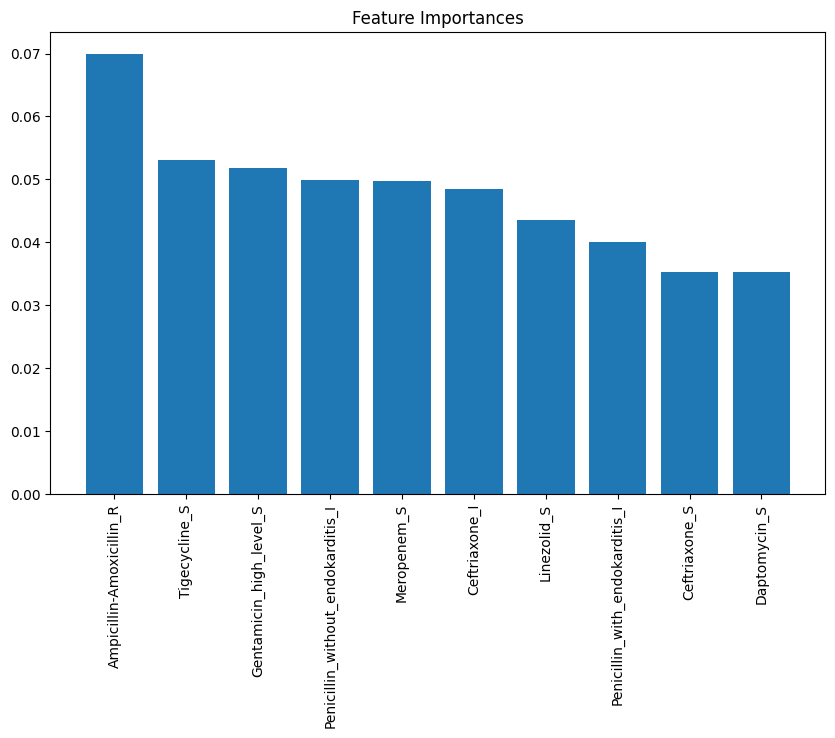

In [ ]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), features[indices[:10]], rotation=90)
plt.show()


In [ ]:

X = df.drop(['Penicillin', 'code'], axis=1)
y = df['Penicillin']


X = pd.get_dummies(X, drop_first=True)

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


Shape of features (X): (2497, 221)
Shape of target (y): (2497,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print("Class distribution in y_train:", y_train.value_counts())
print("Class distribution in y_test:", y_test.value_counts())


Class distribution in y_train: Penicillin
2    1705
0      38
1       4
Name: count, dtype: int64
Class distribution in y_test: Penicillin
2    732
0     17
1      1
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00       732

    accuracy                           1.00       750
   macro avg       0.98      1.00      0.99       750
weighted avg       1.00      1.00      1.00       750



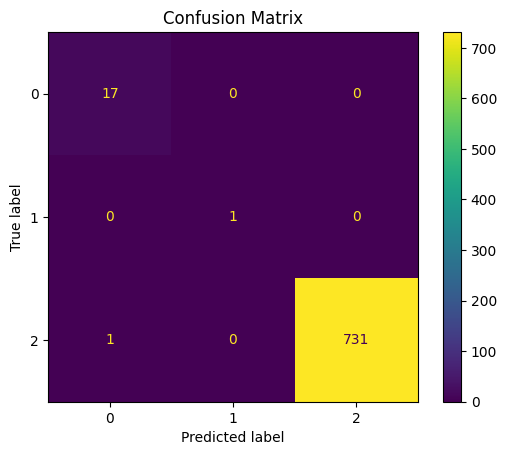

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=[0, 1, 2]  # All classes
)
plt.title("Confusion Matrix")
plt.show()


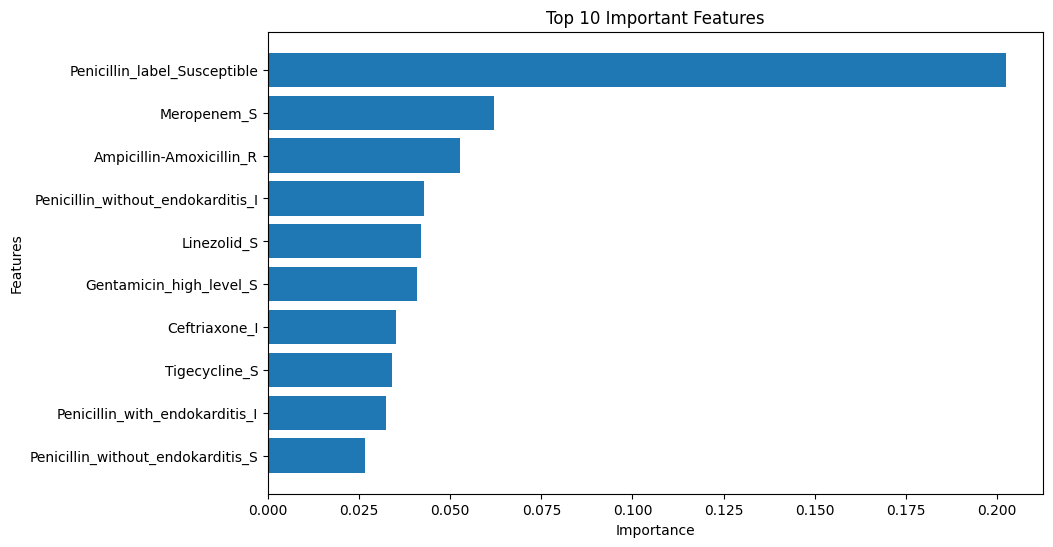

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
feature_importances = rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
top_features = X.columns[sorted_indices[:10]]  # Top 10 features

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.barh(top_features, feature_importances[sorted_indices[:10]])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9994269340974211


## **Predictive Modeling of Antimicrobial Resistance Across Multiple Species Using THE ENTIRE DATASET**

In [ ]:
import os

# Listing the the contents of each dataset folder
print("Contents of DRIAMS-A:", os.listdir('DRIAMS-A'))
print("Contents of DRIAMS-B:", os.listdir('DRIAMS-B'))
print("Contents of DRIAMS-C:", os.listdir('DRIAMS-C'))
print("Contents of DRIAMS-D:", os.listdir('DRIAMS-D'))


Contents of DRIAMS-A: ['binned_6000', 'id']
Contents of DRIAMS-B: ['binned_6000', 'id']
Contents of DRIAMS-C: ['binned_6000', 'id']
Contents of DRIAMS-D: ['binned_6000', 'id']


In [ ]:
import os

# subfolder of each dataset
for folder in ['DRIAMS-A', 'DRIAMS-B', 'DRIAMS-C', 'DRIAMS-D']:
    subfolder_path = os.path.join(folder, 'id')
    print(f"Contents of {subfolder_path}: {os.listdir(subfolder_path)}")


Contents of DRIAMS-A/id: ['2016', '2015', '2018', '2017']
Contents of DRIAMS-B/id: ['2018']
Contents of DRIAMS-C/id: ['2018']
Contents of DRIAMS-D/id: ['2018']


In [ ]:
# Inspecting the contents of each folder
import os

for folder in ['DRIAMS-A', 'DRIAMS-B', 'DRIAMS-C', 'DRIAMS-D']:
    subfolder_path = os.path.join(folder, 'id')
    years = os.listdir(subfolder_path)
    print(f"Years in {folder}:", years)
    for year in years:
        year_path = os.path.join(subfolder_path, year)
        print(f"Files in {year_path}:", os.listdir(year_path))


Years in DRIAMS-A: ['2016', '2015', '2018', '2017']
Files in DRIAMS-A/id/2016: ['2016_strat.csv', '2016_clean.csv']
Files in DRIAMS-A/id/2015: ['2015_clean.csv', '2015_strat.csv']
Files in DRIAMS-A/id/2018: ['2018_clean.csv', '2018_strat.csv']
Files in DRIAMS-A/id/2017: ['2017_strat.csv', '2017_clean.csv']
Years in DRIAMS-B: ['2018']
Files in DRIAMS-B/id/2018: ['2018_clean.csv']
Years in DRIAMS-C: ['2018']
Files in DRIAMS-C/id/2018: ['2018_clean.csv']
Years in DRIAMS-D: ['2018']
Files in DRIAMS-D/id/2018: ['2018_clean.csv']


**Loading and Cleaning and mapping the dataset**

In [ ]:
import pandas as pd

all_data = []

# Defining the dataset folders
dataset_folders = ['DRIAMS-A', 'DRIAMS-B', 'DRIAMS-C', 'DRIAMS-D']

for folder in dataset_folders:
    subfolder_path = os.path.join(folder, 'id')
    years = os.listdir(subfolder_path)
    for year in years:
        file_path = os.path.join(subfolder_path, year, f'{year}_clean.csv')
        if os.path.exists(file_path):
            data = pd.read_csv(file_path)
            data['source'] = folder
            data['year'] = year
            all_data.append(data)

df = pd.concat(all_data, ignore_index=True)

print("Shape of combined dataset:", df.shape)
print("Columns in combined dataset:", df.columns)


<ipython-input-64-c7b545384865>:14: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Shape of combined dataset: (132286, 119)
Columns in combined dataset: Index(['code', 'species', 'laboratory_species', 'Ciprofloxacin', 'Cefepime',
       'Meropenem', 'Piperacillin-Tazobactam', 'Cotrimoxazole', 'Ceftazidime',
       'Levofloxacin',
       ...
       'Cefotaxime', 'Ofloxacin', 'Meropenem-Vaborbactam', 'genus',
       'Piperacillin', 'Pristinamycin', 'Quinupristin-Dalfopristin',
       'Sparfloxacin', 'Telithromycin', 'Ticarcillin'],
      dtype='object', length=119)


In [ ]:
# Droping missinfg values
df = df.dropna(subset=['Penicillin'])

In [ ]:
# Mapping resistance categories to numeric values
df['target_encoded'] = df['Penicillin'].replace({
    'R': 1,  # Resistant
    'I': 0,  # Intermediate
    'S': 2   # Susceptible
})
df = df[df['target_encoded'].notnull()]


<ipython-input-66-42dbbf53affc>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['target_encoded'] = df['Penicillin'].replace({


In [ ]:
df = pd.get_dummies(df, columns=['species', 'source'], drop_first=True)


In [ ]:
X = df.drop(['Penicillin', 'target_encoded', 'year'], axis=1)
y = df['target_encoded']


In [ ]:
print("Unique values in y:", y.unique())
print("Data type of y:", y.dtypes)


Unique values in y: ['-' 1 2 0 'R(1), S(1)' 'I(1), S(1)']
Data type of y: object


In [ ]:

y = y.replace('-', None)
y = y.replace({'R(1), S(1)': 'R', 'I(1), S(1)': 'I'})


In [ ]:

y = y.replace({
    'R': 1,  # Resistant
    'I': 0,  # Intermediate
    'S': 2   # Susceptible
})


<ipython-input-71-49b57737bbba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({


In [ ]:

valid_indices = y.notnull()
X = X[valid_indices]
y = y[valid_indices]

print("Shape of X after cleaning:", X.shape)
print("Shape of y after cleaning:", y.shape)


Shape of X after cleaning: (16819, 689)
Shape of y after cleaning: (16819,)


In [ ]:
print("Unique values in y after cleaning:", y.unique())
print("Data type of y after cleaning:", y.dtypes)


Unique values in y after cleaning: [1. 2. 0.]
Data type of y after cleaning: float64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (11773, 689)
Testing data shape: (5046, 689)


In [ ]:
print("Columns in X_train with non-numeric data:")
print(X_train.select_dtypes(include=['object']).columns)


Columns in X_train with non-numeric data:
Index(['code', 'laboratory_species', 'Ciprofloxacin', 'Cefepime', 'Meropenem',
       'Piperacillin-Tazobactam', 'Cotrimoxazole', 'Ceftazidime',
       'Levofloxacin', 'Colistin',
       ...
       'Polymyxin B', 'Cefalotin-Cefazolin', 'Novobiocin', 'Cefotaxime',
       'Ofloxacin', 'Meropenem-Vaborbactam', 'genus', 'Piperacillin',
       'Telithromycin', 'Ticarcillin'],
      dtype='object', length=105)


In [ ]:
for col in X_train.select_dtypes(include=['object']).columns:
    print(f"Unique values in column '{col}':")
    print(X_train[col].unique()[:10])
    print("\n")


Unique values in column 'code':
['22699978-2c63-4400-af92-8132885363b2_MALDI1'
 '5fafe863-76ec-4e97-b895-707ea386d5af'
 '8d00645a-356e-4cd9-a990-390310401a96_3312'
 '39d1462c-4c86-40d7-bb16-142f1b144c2c_3312'
 '0fcfafb2-eba1-4adf-9e27-e7ac8e7bc12a'
 '151c303b-0b0d-4b50-a63d-25154505da3a'
 '63d16aae-38f1-42df-a088-031d79f4458a_MALDI1'
 '1759ff62-318c-4747-845e-ea1febc2eb02_MALDI1'
 'a64e9663-4a50-46a1-9724-b04bb78b80e1'
 '979abf1e-42a7-4197-9f96-9bb2f471fbcb']


Unique values in column 'laboratory_species':
['Haemophilus influenzae'
 'Streptococcus anginosus (S. anginosus / milleri-Gruppe)' nan
 'Staphylococcus epidermidis' 'Staphylococcus cohnii'
 'Lactobacillus paracasei' 'Staphylococcus aureus'
 'Staphylococcus warneri' 'Staphylococcus hominis'
 'Streptococcus constellatus (S. anginosus / milleri-Gruppe)']


Unique values in column 'Ciprofloxacin':
['-' 'S' 'R' 'R(1), S(1)' nan 'I' 'I(1), S(1)' 'R(1), I(1)'
 'R(1), I(1), S(1)']


Unique values in column 'Cefepime':
['-' nan 'S' 'R' '

In [ ]:
X_train = X_train.drop(['code'], axis=1)
X_test = X_test.drop(['code'], axis=1)


print("Remaining columns in X_train:", X_train.columns)


Remaining columns in X_train: Index(['laboratory_species', 'Ciprofloxacin', 'Cefepime', 'Meropenem',
       'Piperacillin-Tazobactam', 'Cotrimoxazole', 'Ceftazidime',
       'Levofloxacin', 'Colistin', 'Tobramycin',
       ...
       'species_Trueperella bernardiae', 'species_Trueperella pyogenes',
       'species_Turicella otitidis', 'species_Vagococcus fluvialis',
       'species_Veillonella parvula', 'species_Vibrio alginolyticus',
       'species_Yersinia enterocolitica', 'species_Yersinia intermedia',
       'source_DRIAMS-C', 'source_DRIAMS-D'],
      dtype='object', length=688)


In [ ]:

X_train = pd.get_dummies(X_train, columns=['laboratory_species'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['laboratory_species'], drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Shape of X_train after encoding:", X_train.shape)
print("Shape of X_test after encoding:", X_test.shape)


Shape of X_train after encoding: (11773, 855)
Shape of X_test after encoding: (5046, 855)


In [ ]:
# Columns to clean
resistance_columns = ['Ceftriaxone', 'Vancomycin', 'Piperacillin-Tazobactam', 'Ciprofloxacin',
                      'Cefepime', 'Cotrimoxazole', 'Meropenem', 'Moxifloxacin', 'Amoxicillin-Clavulanic acid']

for col in resistance_columns:
    X_train[col] = X_train[col].replace({'-': None, 'R(1), S(1)': 'R', 'I(1), S(1)': 'I', 'R(1), I(1)': 'R'})
    X_test[col] = X_test[col].replace({'-': None, 'R(1), S(1)': 'R', 'I(1), S(1)': 'I', 'R(1), I(1)': 'R'})


resistance_mapping = {'R': 1, 'I': 0, 'S': 2}
for col in resistance_columns:
    X_train[col] = X_train[col].map(resistance_mapping)
    X_test[col] = X_test[col].map(resistance_mapping)

X_train = X_train.dropna(subset=resistance_columns)
X_test = X_test.dropna(subset=resistance_columns)

print("Shape of X_train after cleaning resistance columns:", X_train.shape)
print("Shape of X_test after cleaning resistance columns:", X_test.shape)


Shape of X_train after cleaning resistance columns: (6, 855)
Shape of X_test after cleaning resistance columns: (6, 855)


In [ ]:
# Calculating  the percentage of missing values in the resistance columns
missing_data = X_train[resistance_columns].isnull().mean() * 100
print("Percentage of missing values in resistance columns (training set):")
print(missing_data)


Percentage of missing values in resistance columns (training set):
Ceftriaxone                    0.0
Vancomycin                     0.0
Piperacillin-Tazobactam        0.0
Ciprofloxacin                  0.0
Cefepime                       0.0
Cotrimoxazole                  0.0
Meropenem                      0.0
Moxifloxacin                   0.0
Amoxicillin-Clavulanic acid    0.0
dtype: float64


In [ ]:

for col in resistance_columns:
    print(f"Unique values in {col} (training set):", X_train[col].unique())


Unique values in Ceftriaxone (training set): [1. 2.]
Unique values in Vancomycin (training set): [2.]
Unique values in Piperacillin-Tazobactam (training set): [1. 2.]
Unique values in Ciprofloxacin (training set): [2. 1.]
Unique values in Cefepime (training set): [1. 2.]
Unique values in Cotrimoxazole (training set): [2. 1.]
Unique values in Meropenem (training set): [1. 2.]
Unique values in Moxifloxacin (training set): [2. 1.]
Unique values in Amoxicillin-Clavulanic acid (training set): [1. 2.]


In [ ]:

missing_data_overall = X_train.isnull().mean() * 100
print("Percentage of missing values in all columns (training set):")
print(missing_data_overall[missing_data_overall > 0].sort_values(ascending=False))


Percentage of missing values in all columns (training set):
Cotrimoxazol                                     100.000000
Pefloxacin                                       100.000000
ESBL                                             100.000000
MRSA                                             100.000000
Benzylpenicillin_others                          100.000000
Benzylpenicillin_with_meningitis                 100.000000
Benzylpenicillin_with_pneumonia                  100.000000
Polymyxin B                                      100.000000
Cefalotin-Cefazolin                              100.000000
Novobiocin                                       100.000000
Cefotaxime                                       100.000000
Benzylpenicillin                                 100.000000
Ofloxacin                                        100.000000
Meropenem-Vaborbactam                            100.000000
genus                                            100.000000
Piperacillin                            

In [ ]:
# Dropping columns with 100% missing values
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')

print("Remaining columns in X_train after dropping 100% missing values:", X_train.shape[1])


Remaining columns in X_train after dropping 100% missing values: 826


In [ ]:
# Identify columns with >80% missing values and Dropping these
high_missing_cols = X_train.columns[X_train.isnull().mean() > 0.8]

X_train = X_train.drop(high_missing_cols, axis=1)
X_test = X_test.drop(high_missing_cols, axis=1)

print("Remaining columns in X_train after dropping >80% missing values:", X_train.shape[1])


Remaining columns in X_train after dropping >80% missing values: 826


In [ ]:

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("X_train and X_test column alignment:", X_train.shape, X_test.shape)


X_train and X_test column alignment: (6, 826) (6, 826)


In [ ]:

numerical_cols = X_train.select_dtypes(include=['float', 'int']).columns
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_train[numerical_cols].median())

categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train[categorical_cols] = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
X_test[categorical_cols] = X_test[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])

print("Remaining missing values in X_train:", X_train.isnull().sum().sum())
print("Remaining missing values in X_test:", X_test.isnull().sum().sum())


Remaining missing values in X_train: 0
Remaining missing values in X_test: 0


In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Columns with non-numeric values:", non_numeric_cols)

print("Sample values in non-numeric columns:")
for col in non_numeric_cols:
    print(f"{col}: {X_train[col].unique()[:10]}")


Columns with non-numeric values: Index(['Ceftazidime', 'Levofloxacin', 'Colistin', 'Tobramycin', 'Imipenem',
       'Amikacin', 'Tigecycline', 'Clindamycin', 'Amoxicillin', 'Posaconazole',
       'Itraconazole', 'Voriconazole', 'Caspofungin', 'Amphotericin B',
       'Ertapenem', 'Metronidazole', 'Rifampicin', 'Erythromycin',
       'Fluconazole', 'Anidulafungin', '5-Fluorocytosine', 'Micafungin',
       'Ampicillin-Amoxicillin', 'Norfloxacin', 'Fosfomycin-Trometamol',
       'Cefpodoxime', 'Chloramphenicol', 'Aminoglycosides', 'Quinolones',
       'Daptomycin', 'Teicoplanin', 'Linezolid', 'Gentamicin',
       'Gentamicin_high_level', 'Nitrofurantoin', 'Cefuroxime',
       'Meropenem_without_meningitis', 'Meropenem_with_meningitis',
       'Fosfomycin', 'Aztreonam', 'Cefazolin', 'Tetracycline', 'Fusidic acid',
       'Oxacillin', 'Clarithromycin', 'Isoniazid_.1mg-l', 'Streptomycin',
       'Rifampicin_1mg-l', 'Ethambutol_5mg-l', 'Pyrazinamide', 'Azithromycin',
       'Cefixime', 'Doxyc

In [ ]:
# Replacing '-' with NaN
X_train[non_numeric_cols] = X_train[non_numeric_cols].replace('-', None)
X_test[non_numeric_cols] = X_test[non_numeric_cols].replace('-', None)

print("Missing values after replacing '-' with NaN:")
print(X_train[non_numeric_cols].isnull().sum())

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)


Missing values after replacing '-' with NaN:
Ceftazidime               6
Levofloxacin              6
Colistin                  6
Tobramycin                6
Imipenem                  0
                         ..
Ampicillin-Sulbactam      6
Ceftobiprole              6
Isoniazid_.4mg-l          6
Strepomycin_high_level    6
Isavuconazole             6
Length: 75, dtype: int64


<ipython-input-88-e26592329a39>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train = X_train.fillna(0)
<ipython-input-88-e26592329a39>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test = X_test.fillna(0)


In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
X_train[non_numeric_cols] = X_train[non_numeric_cols].replace('-', None)
X_test[non_numeric_cols] = X_test[non_numeric_cols].replace('-', None)

print("Missing values after replacing '-' with NaN:")
print(X_train[non_numeric_cols].isnull().sum())


Missing values after replacing '-' with NaN:
Imipenem                  0
Tigecycline               0
Clindamycin               0
Rifampicin                0
Erythromycin              0
Ampicillin-Amoxicillin    0
Daptomycin                0
Teicoplanin               0
Linezolid                 0
Gentamicin                0
Cefuroxime                0
Cefazolin                 0
Tetracycline              0
Fusidic acid              0
Oxacillin                 0
Doxycycline               0
Mupirocin                 0
dtype: int64


In [ ]:
resistance_mapping = {'R': 1, 'I': 0, 'S': 2, 'R(1), S(1)': 1}

for col in non_numeric_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].map(resistance_mapping)
    if col in X_test.columns:
        X_test[col] = X_test[col].map(resistance_mapping)

# Verifyig encoding
for col in non_numeric_cols:
    print(f"Unique values in {col} after encoding:", X_train[col].unique())


Unique values in Imipenem after encoding: [1 2]
Unique values in Tigecycline after encoding: [2]
Unique values in Clindamycin after encoding: [1 2]
Unique values in Rifampicin after encoding: [2 1]
Unique values in Erythromycin after encoding: [1 2]
Unique values in Ampicillin-Amoxicillin after encoding: [1]
Unique values in Daptomycin after encoding: [2]
Unique values in Teicoplanin after encoding: [nan  2.]
Unique values in Linezolid after encoding: [2]
Unique values in Gentamicin after encoding: [2 1]
Unique values in Cefuroxime after encoding: [1 2]
Unique values in Cefazolin after encoding: [1 2]
Unique values in Tetracycline after encoding: [1 2]
Unique values in Fusidic acid after encoding: [2 1]
Unique values in Oxacillin after encoding: [1 2]
Unique values in Doxycycline after encoding: [nan  2.]
Unique values in Mupirocin after encoding: [nan  2.]


In [ ]:
# Filling missing values with mode
for col in X_train.columns:
    if X_train[col].isnull().sum() > 0:
        mode_value = X_train[col].mode()[0]  # Most common value
        X_train[col] = X_train[col].fillna(mode_value)
        X_test[col] = X_test[col].fillna(mode_value)

print("Remaining missing values in X_train:", X_train.isnull().sum().sum())
print("Remaining missing values in X_test:", X_test.isnull().sum().sum())


Remaining missing values in X_train: 0
Remaining missing values in X_test: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing scaler and Features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("First 5 rows of scaled X_train:")
print(X_train[:5])


First 5 rows of scaled X_train:
[[ 0.70710678 -1.         -1.         ...  0.          0.
   0.        ]
 [-1.41421356 -1.         -1.         ...  0.          0.
   0.        ]
 [ 0.70710678  1.          1.         ...  0.          0.
   0.        ]
 [ 0.70710678  1.          1.         ...  0.          0.
   0.        ]
 [ 0.70710678  1.          1.         ...  0.          0.
   0.        ]]


In [ ]:
y_train = y_train.iloc[:X_train.shape[0]]

print("Shape of X_train after alignment:", X_train.shape)
print("Shape of y_train after alignment:", y_train.shape)


Shape of X_train after alignment: (6, 826)
Shape of y_train after alignment: (6,)


In [ ]:
print("Initial shape of dataset:", df.shape)

rows_dropped = df.shape[0] - X_train.shape[0]
print(f"Rows dropped during preprocessing: {rows_dropped}")


Initial shape of dataset: (41653, 692)
Rows dropped during preprocessing: 41647


In [ ]:
import os

folders = ['DRIAMS-A', 'DRIAMS-B', 'DRIAMS-C', 'DRIAMS-D']
for folder in folders:
    path = os.path.join(folder, 'id')
    print(f"Files in {folder}/id:")
    for year in os.listdir(path):
        year_path = os.path.join(path, year)
        print(f"{year_path}: {os.listdir(year_path)}")


Files in DRIAMS-A/id:
DRIAMS-A/id/2016: ['2016_strat.csv', '2016_clean.csv']
DRIAMS-A/id/2015: ['2015_clean.csv', '2015_strat.csv']
DRIAMS-A/id/2018: ['2018_clean.csv', '2018_strat.csv']
DRIAMS-A/id/2017: ['2017_strat.csv', '2017_clean.csv']
Files in DRIAMS-B/id:
DRIAMS-B/id/2018: ['2018_clean.csv']
Files in DRIAMS-C/id:
DRIAMS-C/id/2018: ['2018_clean.csv']
Files in DRIAMS-D/id:
DRIAMS-D/id/2018: ['2018_clean.csv']


In [ ]:
import pandas as pd
import os

datasets = ['DRIAMS-A', 'DRIAMS-B', 'DRIAMS-C', 'DRIAMS-D']
combined_data = []

for dataset in datasets:
    id_path = os.path.join(dataset, 'id')
    for year in os.listdir(id_path):
        year_path = os.path.join(id_path, year, f'{year}_clean.csv')
        if os.path.exists(year_path):
            print(f"Loading: {year_path}")
            data = pd.read_csv(year_path)
            data['source'] = dataset
            data['year'] = year
            combined_data.append(data)

df = pd.concat(combined_data, ignore_index=True)

print("Shape of combined dataset:", df.shape)
print("Columns in combined dataset:", df.columns)


Loading: DRIAMS-A/id/2016/2016_clean.csv
Loading: DRIAMS-A/id/2015/2015_clean.csv
Loading: DRIAMS-A/id/2018/2018_clean.csv
Loading: DRIAMS-A/id/2017/2017_clean.csv


<ipython-input-96-be204cdf3b1e>:13: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(year_path)


Loading: DRIAMS-B/id/2018/2018_clean.csv
Loading: DRIAMS-C/id/2018/2018_clean.csv
Loading: DRIAMS-D/id/2018/2018_clean.csv
Shape of combined dataset: (132286, 119)
Columns in combined dataset: Index(['code', 'species', 'laboratory_species', 'Ciprofloxacin', 'Cefepime',
       'Meropenem', 'Piperacillin-Tazobactam', 'Cotrimoxazole', 'Ceftazidime',
       'Levofloxacin',
       ...
       'Cefotaxime', 'Ofloxacin', 'Meropenem-Vaborbactam', 'genus',
       'Piperacillin', 'Pristinamycin', 'Quinupristin-Dalfopristin',
       'Sparfloxacin', 'Telithromycin', 'Ticarcillin'],
      dtype='object', length=119)


In [ ]:
mixed_type_columns = [col for col in df.columns if df[col].dtype == 'object']

# Checking unique values in these columns
for col in mixed_type_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()[:10]}\n")


Column: code
Unique values: ['f63cc91d-2b13-4dff-9a0d-3f15a2e18afb'
 'd63faaaa-480f-4dc9-940b-e87e9abb0ccf'
 '78905bde-3760-4b83-87bc-ccb967458b11'
 '4cbccad1-dbe8-4b09-aaca-e0350a16f96c'
 'f65b8033-6d6a-43ac-9d4f-296455a66f3a'
 '6c59581d-fab1-4794-bc49-5185a1430082'
 'c676ac03-6100-4c2a-9fb4-1290cd497e6c'
 'ed697566-6d58-4e6e-81d4-4fcaacc98a1e'
 '041857c7-60c5-4e91-8f31-19378751182f'
 '8f383cb2-ba47-4995-8a51-5f44324089ef']

Column: species
Unique values: ['Gardnerella vaginalis' 'Corynebacterium accolens'
 'Staphylococcus aureus' 'Proteus mirabilis' 'Pseudomonas aeruginosa'
 'Escherichia coli' 'Haemophilus parainfluenzae' 'Candida albicans'
 'MIX!Haemophilus sputorum' 'Actinobacillus ureae']

Column: laboratory_species
Unique values: ['Gardnerella vaginalis' 'Corynebacterium accolens'
 'Staphylococcus aureus, Oxacillin-/Methicillin-resistent (MRSA)'
 'Proteus mirabilis' 'Pseudomonas aeruginosa' 'Escherichia coli' nan
 'Candida albicans' 'Haemophilus influenzae' 'Actinobacillus ureae'

In [ ]:
# Replacing ambiguous values ('-') with NaN
df = df.replace('-', None)

for col in mixed_type_columns[:10]:  # Check a few columns
    print(f"Unique values in {col} after replacing '-':", df[col].unique()[:10])


Unique values in code after replacing '-': ['f63cc91d-2b13-4dff-9a0d-3f15a2e18afb'
 'd63faaaa-480f-4dc9-940b-e87e9abb0ccf'
 '78905bde-3760-4b83-87bc-ccb967458b11'
 '4cbccad1-dbe8-4b09-aaca-e0350a16f96c'
 'f65b8033-6d6a-43ac-9d4f-296455a66f3a'
 '6c59581d-fab1-4794-bc49-5185a1430082'
 'c676ac03-6100-4c2a-9fb4-1290cd497e6c'
 'ed697566-6d58-4e6e-81d4-4fcaacc98a1e'
 '041857c7-60c5-4e91-8f31-19378751182f'
 '8f383cb2-ba47-4995-8a51-5f44324089ef']
Unique values in species after replacing '-': ['Gardnerella vaginalis' 'Corynebacterium accolens'
 'Staphylococcus aureus' 'Proteus mirabilis' 'Pseudomonas aeruginosa'
 'Escherichia coli' 'Haemophilus parainfluenzae' 'Candida albicans'
 'MIX!Haemophilus sputorum' 'Actinobacillus ureae']
Unique values in laboratory_species after replacing '-': ['Gardnerella vaginalis' 'Corynebacterium accolens'
 'Staphylococcus aureus, Oxacillin-/Methicillin-resistent (MRSA)'
 'Proteus mirabilis' 'Pseudomonas aeruginosa' 'Escherichia coli' nan
 'Candida albicans' 'Hae

In [ ]:
# Simplify complex resistance categories
simplify_mapping = {
    'R(1), S(1)': 'R', 'I(1), S(1)': 'I', 'R(1), I(1)': 'R',
    'R(1), I(1), S(1)': 'R', 'S(2)': 'S', 'R(2)': 'R'
}

resistance_columns = [
    'Penicillin', 'Ceftriaxone', 'Vancomycin', 'Piperacillin-Tazobactam',
    'Ciprofloxacin', 'Cefepime', 'Cotrimoxazole', 'Meropenem',
    'Moxifloxacin', 'Amoxicillin-Clavulanic acid'
]

resistance_mapping = {'R': 1, 'I': 0, 'S': 2}
for col in resistance_columns:
    df[col] = df[col].replace(simplify_mapping).map(resistance_mapping)

for col in resistance_columns:
    print(f"Unique values in {col} after encoding:", df[col].unique())


Unique values in Penicillin after encoding: [nan  1.  2.  0.]
Unique values in Ceftriaxone after encoding: [nan  2.  1.  0.]
Unique values in Vancomycin after encoding: [nan  2.  1.]
Unique values in Piperacillin-Tazobactam after encoding: [nan  2.  1.  0.]
Unique values in Ciprofloxacin after encoding: [nan  2.  0.  1.]
Unique values in Cefepime after encoding: [nan  2.  1.  0.]
Unique values in Cotrimoxazole after encoding: [nan  2.  1.  0.]
Unique values in Meropenem after encoding: [nan  2.  1.  0.]
Unique values in Moxifloxacin after encoding: [nan  2.  1.  0.]
Unique values in Amoxicillin-Clavulanic acid after encoding: [nan  2.  1.  0.]


In [ ]:
target_column = 'Penicillin'
df = df.dropna(subset=[target_column])

print("Shape of dataset after dropping missing target rows:", df.shape)


Shape of dataset after dropping missing target rows: (16819, 119)


In [ ]:
# Imputating numerical columns with median
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Imputating categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("Remaining missing values in the dataset:", df.isnull().sum().sum())


<ipython-input-101-68cda5bb3fc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())


Remaining missing values in the dataset: 790493


<ipython-input-101-68cda5bb3fc8>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [ ]:
missing_threshold = 0.8
missing_percentages = df.isnull().mean()
high_missing_cols = missing_percentages[missing_percentages > missing_threshold].index

df = df.drop(columns=high_missing_cols)
print("Shape of dataset after dropping high-missing columns:", df.shape)


Shape of dataset after dropping high-missing columns: (16819, 72)


In [ ]:
# Imputating numerical columns with median
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Imputating categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("Remaining missing values in the dataset:", df.isnull().sum().sum())


Remaining missing values in the dataset: 0


In [ ]:
print("Final dataset shape:", df.shape)
print("Columns in the dataset:", df.columns)


Final dataset shape: (16819, 72)
Columns in the dataset: Index(['code', 'species', 'laboratory_species', 'Ciprofloxacin', 'Cefepime',
       'Meropenem', 'Piperacillin-Tazobactam', 'Cotrimoxazole', 'Ceftazidime',
       'Levofloxacin', 'Colistin', 'Tobramycin', 'Ceftriaxone', 'Imipenem',
       'Amikacin', 'Tigecycline', 'Clindamycin', 'Amoxicillin-Clavulanic acid',
       'Amoxicillin', 'Penicillin', 'Vancomycin', 'Ertapenem', 'Metronidazole',
       'Moxifloxacin', 'Rifampicin', 'Erythromycin', 'Ampicillin-Amoxicillin',
       'Norfloxacin', 'Fosfomycin-Trometamol', 'Chloramphenicol',
       'Aminoglycosides', 'Quinolones', 'Daptomycin', 'Teicoplanin',
       'Linezolid', 'Gentamicin', 'Gentamicin_high_level', 'Nitrofurantoin',
       'Cefuroxime', 'Meropenem_without_meningitis',
       'Meropenem_with_meningitis', 'Fosfomycin', 'Cefazolin', 'Tetracycline',
       'Fusidic acid', 'Oxacillin', 'Clarithromycin', 'Rifampicin_1mg-l',
       'Azithromycin', 'Doxycycline', 'Mupirocin', 'Va

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Penicillin'])
y = df['Penicillin']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (11773, 71)
Test set shape: (5046, 71)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train = pd.concat(
    [X_train.drop(columns=categorical_cols).reset_index(drop=True),
     pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))],
    axis=1
)

X_test = pd.concat(
    [X_test.drop(columns=categorical_cols).reset_index(drop=True),
     pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))],
    axis=1
)

print("Shape after encoding:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Shape after encoding:
X_train: (11773, 12339)
X_test: (5046, 12339)


In [ ]:

non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols)

if len(non_numeric_cols) > 0:
    print("Sample values in non-numeric columns:")
    print(X_train[non_numeric_cols].head())


Non-numeric columns in X_train: Index([], dtype='object')


In [ ]:

X_train = X_train.drop(columns=['code'], errors='ignore')
X_test = X_test.drop(columns=['code'], errors='ignore')


In [ ]:

resistance_columns = X_train.columns

# Mapping for resistance values
resistance_mapping = {'R': 1, 'I': 0, 'S': 2}

for col in resistance_columns:
    X_train[col] = X_train[col].replace(resistance_mapping)
    X_test[col] = X_test[col].replace(resistance_mapping)

for col in resistance_columns[:5]:  # Check first 5 columns
    print(f"Unique values in {col} after encoding:", X_train[col].unique())


Unique values in Ciprofloxacin after encoding: [2. 1. 0.]
Unique values in Cefepime after encoding: [2. 1.]
Unique values in Meropenem after encoding: [2. 1. 0.]
Unique values in Piperacillin-Tazobactam after encoding: [2. 1. 0.]
Unique values in Cotrimoxazole after encoding: [2. 1. 0.]


In [ ]:

simplify_mapping = {
    'R(1), S(1)': 'R', 'I(1), S(1)': 'I', 'R(1), I(1)': 'R',
    'R(1), I(1), S(1)': 'R', 'S(2)': 'S', 'R(2)': 'R'
}

resistance_columns = X_train.columns
for col in resistance_columns:
    X_train[col] = X_train[col].replace(simplify_mapping)
    X_test[col] = X_test[col].replace(simplify_mapping)

for col in resistance_columns[:5]:
    print(f"Unique values in {col} after simplifying:", X_train[col].unique())


Unique values in Ciprofloxacin after simplifying: [2. 1. 0.]
Unique values in Cefepime after simplifying: [2. 1.]
Unique values in Meropenem after simplifying: [2. 1. 0.]
Unique values in Piperacillin-Tazobactam after simplifying: [2. 1. 0.]
Unique values in Cotrimoxazole after simplifying: [2. 1. 0.]


In [ ]:
# Mapping resistance categories to numeric
resistance_mapping = {'R': 1, 'I': 0, 'S': 2}
for col in resistance_columns:
    X_train[col] = X_train[col].replace(resistance_mapping)
    X_test[col] = X_test[col].replace(resistance_mapping)

# Verifying numeric encoding
for col in resistance_columns[:5]:  # Check first 5 columns
    print(f"Unique values in {col} after encoding:", X_train[col].unique())


Unique values in Ciprofloxacin after encoding: [2. 1. 0.]
Unique values in Cefepime after encoding: [2. 1.]
Unique values in Meropenem after encoding: [2. 1. 0.]
Unique values in Piperacillin-Tazobactam after encoding: [2. 1. 0.]
Unique values in Cotrimoxazole after encoding: [2. 1. 0.]


In [ ]:
# Imputating missing values with median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

print("Remaining missing values in X_train:", X_train.isnull().sum().sum())
print("Remaining missing values in X_test:", X_test.isnull().sum().sum())


Remaining missing values in X_train: 0
Remaining missing values in X_test: 0


# **Random Forest Classifier**

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.65      0.73        93
         1.0       0.97      0.99      0.98      3667
         2.0       0.95      0.91      0.93      1286

    accuracy                           0.96      5046
   macro avg       0.92      0.85      0.88      5046
weighted avg       0.96      0.96      0.96      5046



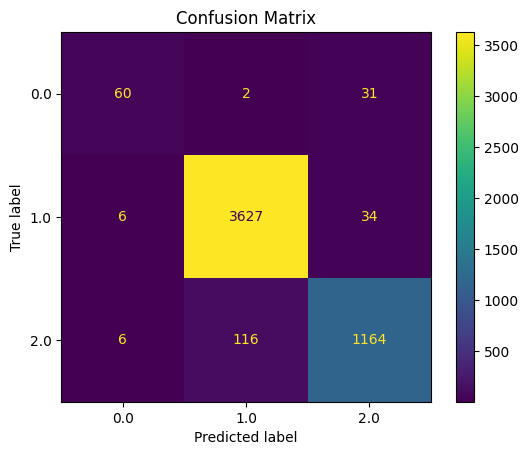

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Training and Predicting Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Model Evaluatation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


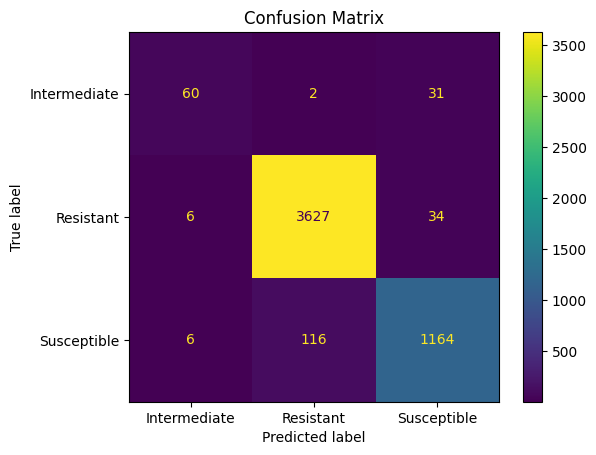

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, display_labels=['Intermediate', 'Resistant', 'Susceptible'])
plt.title("Confusion Matrix")
plt.show()


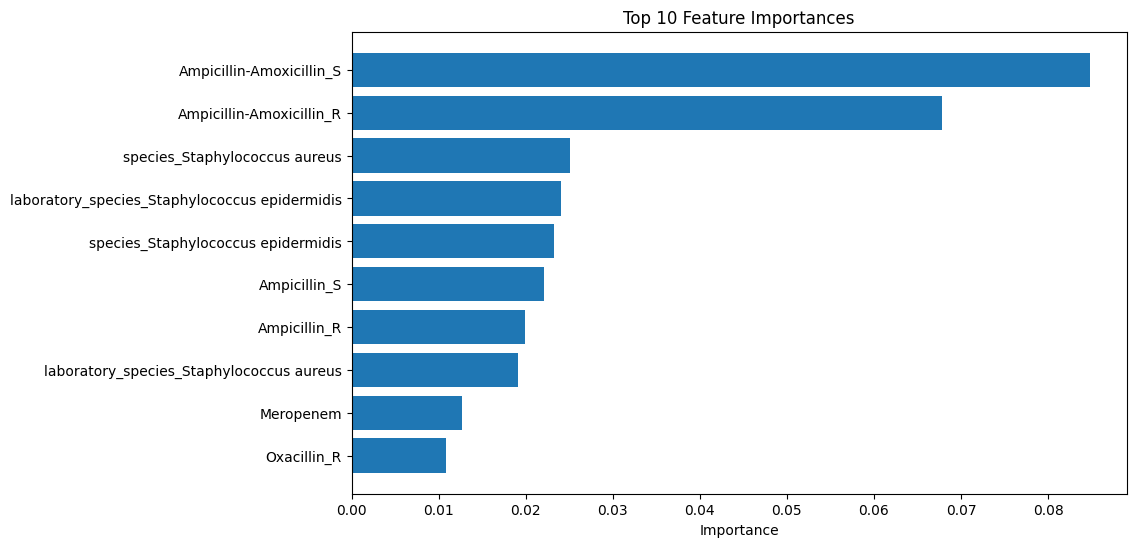

In [ ]:
# TOP Feature importance
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()


# FeedForward Neural Network Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Defining the FFneural network architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │       3,159,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,200,387 (12.21 MB)

 Trainable params: 3,200,387 (12.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training and Evaluation of the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.5997 - loss: 25.0237 - val_accuracy: 0.7267 - val_loss: 0.6711
Epoch 2/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6858 - loss: 0.8141 - val_accuracy: 0.7267 - val_loss: 0.6576
Epoch 3/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7236 - loss: 0.6651 - val_accuracy: 0.7267 - val_loss: 0.6542
Epoch 4/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7219 - loss: 0.6587 - val_accuracy: 0.7267 - val_loss: 0.6540
Epoch 5/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7185 - loss: 0.6577 - val_accuracy: 0.7267 - val_loss: 0.6547
Epoch 6/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7338 - loss: 0.6470 - val_accuracy: 0.7267 - val_loss: 0.6540
Epoch 7/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7347 - loss: 0.6393 - val_accuracy: 0.7267 - val_loss: 0.6539
Epoch 8/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7333 - loss: 0.6476 - val_accuracy

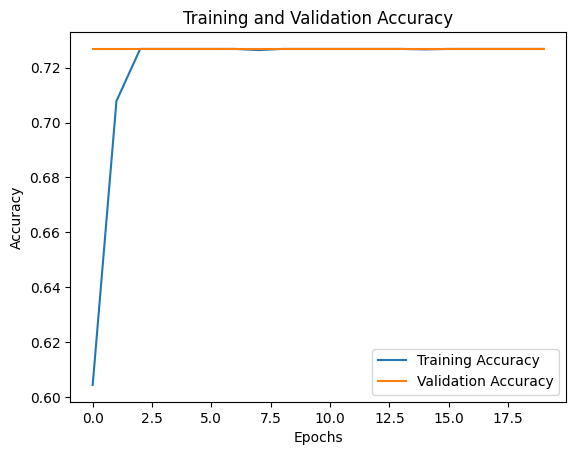

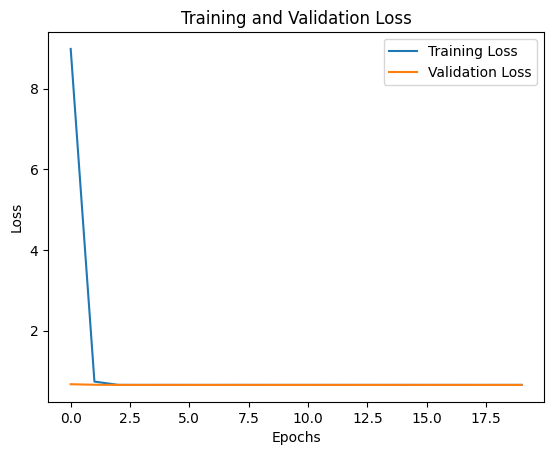

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        93
         1.0       0.73      1.00      0.84      3667
         2.0       0.00      0.00      0.00      1286

    accuracy                           0.73      5046
   macro avg       0.24      0.33      0.28      5046
weighted avg       0.53      0.73      0.61      5046



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


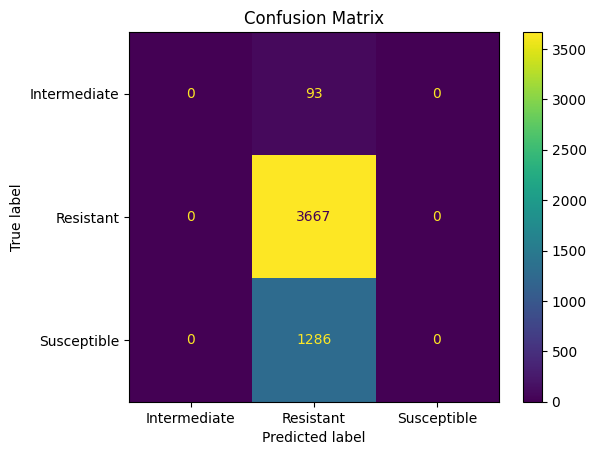

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predicting classes
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, display_labels=['Intermediate', 'Resistant', 'Susceptible'])
plt.title("Confusion Matrix")
plt.show()


# Gradient Boosting using **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [ ]:
print("Sample feature names in X_train:")
print(X_train.columns[:10])


Sample feature names in X_train:
Index(['Ciprofloxacin', 'Cefepime', 'Meropenem', 'Piperacillin-Tazobactam',
       'Cotrimoxazole', 'Ceftriaxone', 'Amoxicillin-Clavulanic acid',
       'Vancomycin', 'Moxifloxacin', 'Unnamed: 0.1'],
      dtype='object')


In [ ]:
# Convert feature names to strings and replace invalid characters
X_train.columns = X_train.columns.astype(str).str.replace("[", "").str.replace("]", "").str.replace("<", "").str.replace(">", "")
X_test.columns = X_test.columns.astype(str).str.replace("[", "").str.replace("]", "").str.replace("<", "").str.replace(">", "")


In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:53:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:55:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_pred = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, xgb_pred, target_names=['Intermediate', 'Resistant', 'Susceptible']))


Classification Report:
              precision    recall  f1-score   support

Intermediate       0.76      0.66      0.71        93
   Resistant       0.97      0.99      0.98      3667
 Susceptible       0.94      0.91      0.92      1286

    accuracy                           0.96      5046
   macro avg       0.89      0.85      0.87      5046
weighted avg       0.96      0.96      0.96      5046



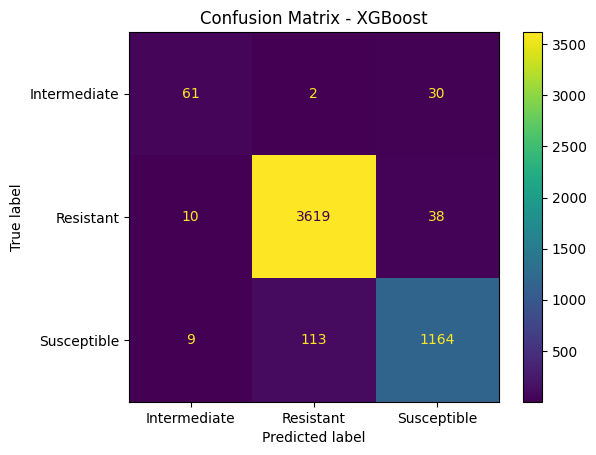

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    xgb_model, X_test, y_test, display_labels=['Intermediate', 'Resistant', 'Susceptible']
)
plt.title("Confusion Matrix - XGBoost")
plt.show()


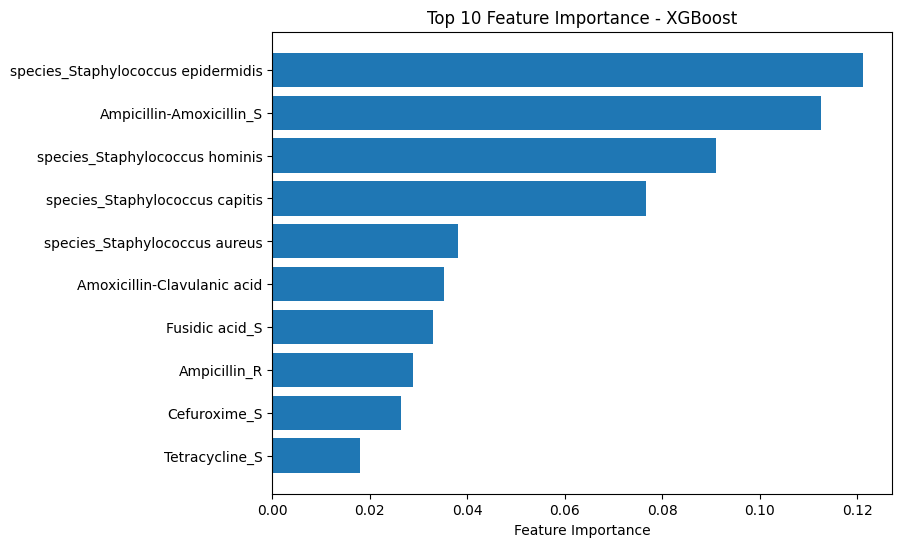

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# feature importance
xgb_importance = xgb_model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(xgb_importance)[::-1]
top_10_features = sorted_idx[:10]

plt.figure(figsize=(8, 6))
plt.barh(range(10), xgb_importance[top_10_features][::-1])
plt.yticks(range(10), [feature_names[i] for i in top_10_features][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importance - XGBoost")
plt.show()


# **Comparison of three algorithms**

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("rf_pred shape:", rf_pred.shape)


X_test shape: (5046, 12339)
y_test shape: (5046,)
rf_pred shape: (3000,)


In [ ]:
train_features = set(X_train.columns)
test_features = set(X_test.columns)

extra_in_test = test_features - train_features
missing_in_test = train_features - test_features

print("Features in test but not in train:", extra_in_test)
print("Features in train but not in test:", missing_in_test)


Features in test but not in train: set()
Features in train but not in test: set()


In [ ]:
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
def clean_column_names(df):
    df.columns = df.columns.str.replace(r"[\[\]']", "", regex=True)
    df.columns = df.columns.str.replace(" ", "_")
    return df

X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
print("Features in X_train and X_test match:", X_train.columns.equals(X_test_aligned.columns))


Features in X_train and X_test match: True


In [ ]:
def clean_column_names(df):

    df.columns = df.columns.str.replace(r"[\(\),]", "_", regex=True)
    df.columns = df.columns.str.replace(" ", "_")
    df.columns = df.columns.str.replace("__+", "_", regex=True)
    return df


In [ ]:
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
print("Do X_train and X_test have the same columns?", X_train.columns.equals(X_test_aligned.columns))


Do X_train and X_test have the same columns? True


In [ ]:
def clean_feature_names(df):
    df.columns = (
        df.columns.str.replace(r"[^\w\s]", "_", regex=True)
        .str.replace(" ", "_")
        .str.replace("__+", "_", regex=True)
        .str.strip("_")
    )
    return df

X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)


In [ ]:
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
print("Columns match:", X_train.columns.equals(X_test_aligned.columns))
print("Number of columns in X_train:", len(X_train.columns))
print("Number of columns in X_test_aligned:", len(X_test_aligned.columns))


Columns match: True
Number of columns in X_train: 12339
Number of columns in X_test_aligned: 12339


In [ ]:

train_features = X_train.columns


In [ ]:

X_test_aligned = X_test.copy()

X_test_aligned.columns = train_features


In [ ]:
train_feature_names = rf_model.feature_names_in_


In [ ]:
X_test_aligned = X_test.copy()

X_test_aligned = X_test_aligned.reindex(columns=train_feature_names, fill_value=0)


In [ ]:
rf_pred = rf_model.predict(X_test_aligned)
print("Prediction successful! Shape of predictions:", rf_pred.shape)


Prediction successful! Shape of predictions: (5046,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall = recall_score(y_test, rf_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Display metrics
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.15      0.24        93
         1.0       0.74      1.00      0.85      3667
         2.0       0.97      0.08      0.15      1286

    accuracy                           0.75      5046
   macro avg       0.77      0.41      0.42      5046
weighted avg       0.80      0.75      0.66      5046

Accuracy: 0.7489
Precision: 0.7998
Recall: 0.7489
F1 Score: 0.6632


In [ ]:
# Prediction with the Neural Network
nn_pred = model.predict(X_test)
nn_pred = nn_pred.argmax(axis=1)
print("Neural Network Predictions Generated. Shape:", nn_pred.shape)


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Neural Network Predictions Generated. Shape: (5046,)


In [ ]:
# Neural Network Metrics
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred, average='weighted')
nn_recall = recall_score(y_test, nn_pred, average='weighted')
nn_f1 = f1_score(y_test, nn_pred, average='weighted')

print("Neural Network Classification Report:")
print(classification_report(y_test, nn_pred))


Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        93
         1.0       0.73      1.00      0.84      3667
         2.0       0.00      0.00      0.00      1286

    accuracy                           0.73      5046
   macro avg       0.24      0.33      0.28      5046
weighted avg       0.53      0.73      0.61      5046



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
# XGBoost Metrics
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Neural Network Metrics
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred, average='weighted')
nn_recall = recall_score(y_test, nn_pred, average='weighted')
nn_f1 = f1_score(y_test, nn_pred, average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

metrics_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'XGBoost'],
    'Accuracy': [rf_accuracy, nn_accuracy, xgb_accuracy],
    'Precision': [rf_precision, nn_precision, xgb_precision],
    'Recall': [rf_recall, nn_recall, xgb_recall],
    'F1-Score': [rf_f1, nn_f1, xgb_f1]
})


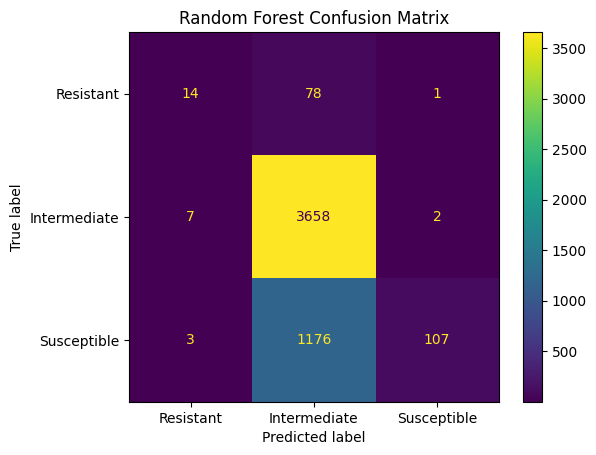

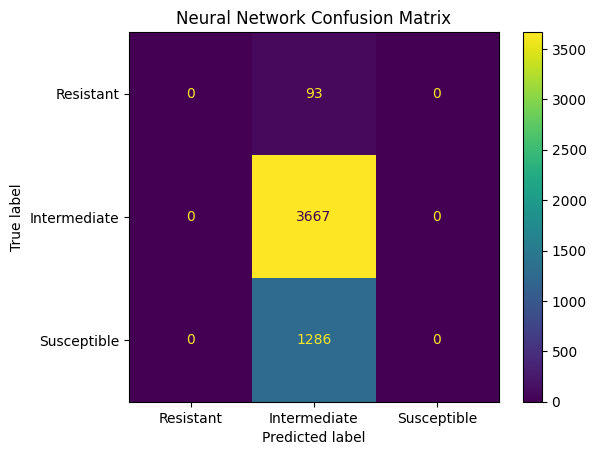

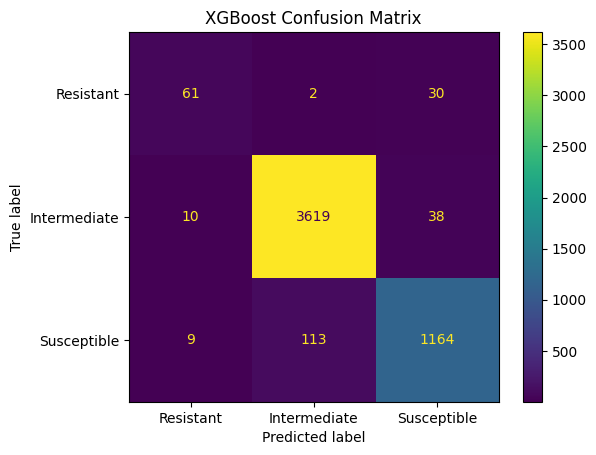

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, display_labels=['Resistant', 'Intermediate', 'Susceptible'])
plt.title("Random Forest Confusion Matrix")
plt.show()

# Neural Network Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, nn_pred, display_labels=['Resistant', 'Intermediate', 'Susceptible'])
plt.title("Neural Network Confusion Matrix")
plt.show()

# XGBoost Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_pred, display_labels=['Resistant', 'Intermediate', 'Susceptible'])
plt.title("XGBoost Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# Create a comparison table
metrics_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'FFNeural Network', 'XGBoost'],
    'Accuracy': [rf_accuracy, nn_accuracy, xgb_accuracy],
    'Precision': [rf_precision, nn_precision, xgb_precision],
    'Recall': [rf_recall, nn_recall, xgb_recall],
    'F1-Score': [rf_f1, nn_f1, xgb_f1]
})

print(metrics_comparison)


              Model  Accuracy  Precision    Recall  F1-Score
0     Random Forest  0.748910   0.799845  0.748910  0.663206
1  FFNeural Network  0.726714   0.528114  0.726714  0.611698
2           XGBoost  0.959968   0.959175  0.959968  0.959331
